TRADITIONAL REGRESSION WITHOUT REGULARIZATION



In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error
from math import sqrt


def evaluate_models(file_path, num_runs, num_splits, degree_array, models, excluded_columns):
    data = pd.read_csv(file_path)
    
    Percentage_Rmses = np.zeros((num_runs, num_splits, len(degree_array), len(models)))
    
    for run in range(num_runs):
        print(f"Run {run+1}/{num_runs} for {file_path}")
        kf = KFold(n_splits=num_splits, shuffle=True, random_state=run)
        
        for fold, (train_index, test_index) in enumerate(kf.split(data)):
            print(f"  Fold {fold+1}/{num_splits}")
            
            train_df = data.iloc[train_index]
            test_df = data.iloc[test_index]
            X_train = train_df.drop(columns=excluded_columns)
            y_train = train_df['ALM']
            X_test = test_df.drop(columns=excluded_columns)
            y_test = test_df['ALM']

            normalizer = StandardScaler()
            X_train = normalizer.fit_transform(X_train)
            X_test = normalizer.transform(X_test)

            for model_idx, (model_name, model) in enumerate(models):
                for j in range(len(degree_array)):
                    pipeline = make_pipeline(PolynomialFeatures(degree_array[j]), model)
                    pipeline.fit(X_train, y_train)
                    test_predictions = pipeline.predict(X_test)
                    test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
                    average_alm_test = np.mean(y_test)
                    percent_rmse = (test_rmse / average_alm_test) * 100
                    Percentage_Rmses[run, fold, j, model_idx] = percent_rmse

    mean_rmse = np.mean(Percentage_Rmses, axis=1)
    std_rmse = np.std(Percentage_Rmses, axis=1)

    return Percentage_Rmses, mean_rmse, std_rmse

# File paths of the CSV files
file_paths = {
    'Male Data': './../Data/male.csv',
    'Female Data': './../Data/female.csv',
    'Complete Data': './../Data/complete_data.csv'
}

num_runs = 10
num_splits = 5
degree_array = [1, 2, 3]
models = [
    ("Traditional Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Bayesian Ridge Regression", BayesianRidge())
]
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]

results = {}
for name, file_path in file_paths.items():
    Percentage_Rmses, mean_rmse, std_rmse = evaluate_models(file_path, num_runs, num_splits, degree_array, models, excluded_columns)
    results[name] = (Percentage_Rmses, mean_rmse, std_rmse)

for name, (Percentage_Rmses, mean_rmse, std_rmse) in results.items():
    print(f"\nResults for {name}:")
    print("Mean Percentage RMSEs for each run and degree:")
    print(mean_rmse)
    print("\nStandard Deviation of Percentage RMSEs for each run and degree:")
    print(std_rmse)


Run 1/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 2/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 3/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 4/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 5/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 6/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 7/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 8/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 9/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 10/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 1/10 for ./../Data/female.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 2/10 for ./../Data/female.csv
  Fold

In [14]:
print(Percentage_Rmses)

column_averages = np.mean(Percentage_Rmses, axis=0)
print("Average RMSEs are:", column_averages)


[[[[ 9.14169393 14.04747957  9.21197999  9.0799327 ]
   [17.93758903 13.55865384 13.37492958 11.70891738]
   [17.8686086  15.9660586  17.59602849 14.7954461 ]]

  [[ 7.41884183 13.17137138  7.15365937  7.16644547]
   [14.19377658 12.49482276 10.07343201  8.40580138]
   [19.75357723 14.46547913 19.08334853 11.46883057]]

  [[ 8.3124224  14.02244588  8.59583872  8.45581517]
   [19.49213377 13.37724157 11.8477097   9.21575634]
   [20.59290187 16.00483372 19.85567641 13.52322807]]

  [[ 8.01894797 14.16084845  8.05338727  7.9689444 ]
   [16.27783845 13.65339229 10.75002804  9.17550583]
   [17.68548008 15.29879171 17.03591115 11.46716744]]

  [[32.7607463  16.07367773  9.99864074  9.895482  ]
   [17.64982921 15.58457949 12.06927765 11.24839514]
   [14.80824729 17.33727785 14.47149235 12.61562268]]]


 [[[23.79026347 16.08171657  9.0414531   8.99075281]
   [16.79067056 15.39848598 10.31721232  9.7937866 ]
   [22.30386087 17.73170108 21.65700008 15.67212527]]

  [[ 8.12796698 13.61142823  8.3

In [15]:
print(mean_rmse)

[[[13.13053049 14.2951646   8.60270122  8.51332395]
  [17.11023341 13.73373799 11.6230754   9.95087521]
  [18.14176301 15.8144882  17.60849139 12.77405897]]

 [[11.48734992 14.22042289  8.6204593   8.54307711]
  [17.38403183 13.57637698 10.70537523  9.32096304]
  [18.64753362 15.72979839 18.12846823 13.11200664]]

 [[11.04987674 14.23884173  8.56235498  8.47747905]
  [16.03722331 13.61010289 10.47543761  9.33648922]
  [17.60281133 15.81149241 17.06628526 12.15917645]]

 [[10.59344798 14.24301737  8.44267327  8.31910611]
  [16.14775708 13.65749125 11.07815683  9.49207363]
  [17.19086763 15.6763847  16.74997814 12.08557311]]

 [[12.21714026 14.20280988  8.72631603  8.67698344]
  [17.21706738 13.64039857 10.9150779   9.6692746 ]
  [18.91750915 15.58350735 18.26350495 12.58337813]]

 [[11.69644591 14.22752647  8.65546642  8.5654927 ]
  [16.83279076 13.61813072 11.52733381  9.68768056]
  [17.13162809 15.79464903 16.66180554 12.79467839]]

 [[13.11330213 14.19786546  8.77328289  8.71904743]


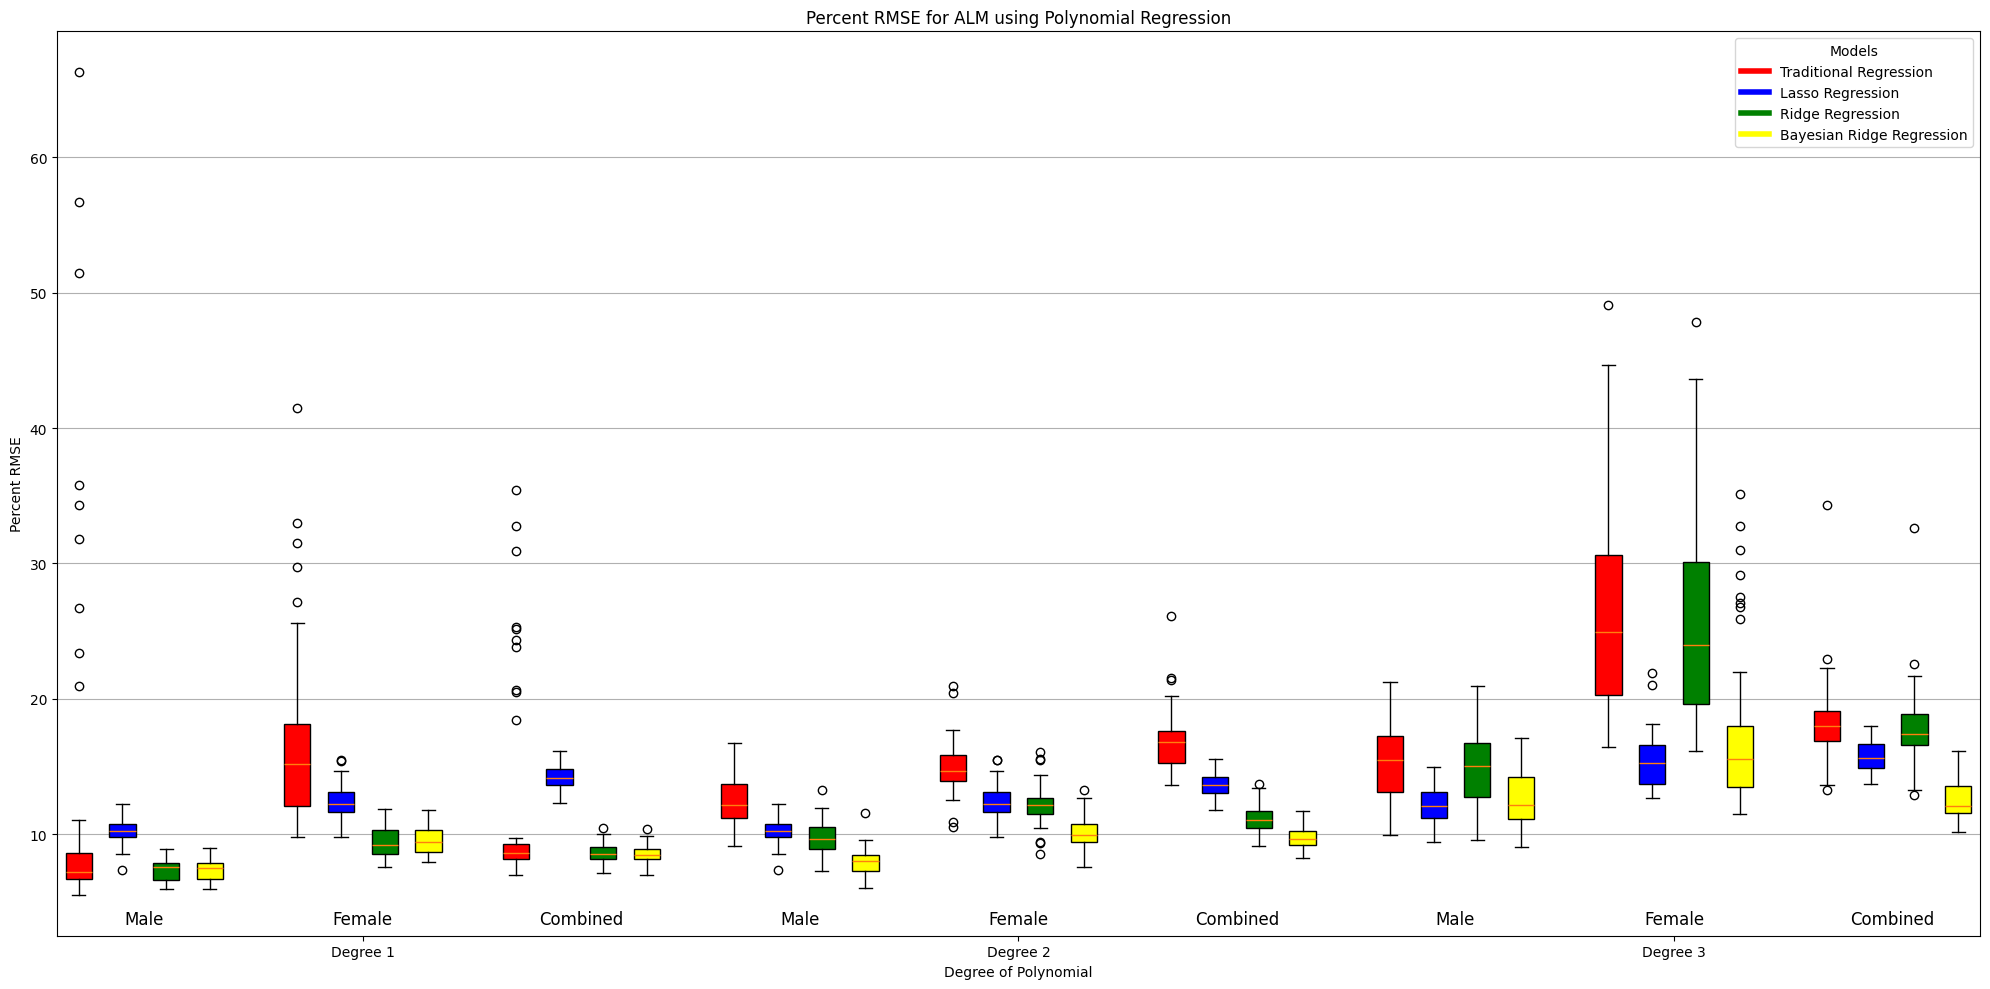

In [16]:
import matplotlib.pyplot as plt
import numpy as np

file_names = list(file_paths.keys())
num_files = len(file_names)
num_models = len(models)
degree_labels = [f'Degree {d}' for d in degree_array]
colors = ['red', 'blue', 'green', 'yellow'] 

all_rmse_values = []
box_positions = []
box_colors = []

gap = 3

for j, degree in enumerate(degree_array):
    for file_idx, file_name in enumerate(file_names):
        Percentage_Rmses = results[file_name][0]  # Extract Percentage_Rmses for the current file
        for model_idx, (model_name, _) in enumerate(models):
            rmse_values = Percentage_Rmses[:, :, j, model_idx].flatten()
            position = (j * (num_files * num_models + gap)) + (file_idx * (num_models + 1)) + model_idx + 1
            all_rmse_values.append(rmse_values)
            box_positions.append(position)
            box_colors.append(colors[model_idx])

plt.figure(figsize=(20, 10))

for rmse_values, position, color in zip(all_rmse_values, box_positions, box_colors):
    plt.boxplot(rmse_values, positions=[position], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))

degree_positions = [(i * (num_files * num_models + gap)) + ((num_files * num_models + gap) / 2) for i in range(len(degree_array))]
degree_labels = [f'Degree {d}' for d in degree_array]
plt.xticks(degree_positions, degree_labels)

# Adding custom labels above the x-axis
for j in range(len(degree_array)):
    base_position = j * (num_files * num_models + gap)
    plt.text(base_position + 2.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Male', horizontalalignment='center', fontsize=12)
    plt.text(base_position + 7.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Female', horizontalalignment='center', fontsize=12)
    plt.text(base_position + 12.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Combined', horizontalalignment='center', fontsize=12)

plt.xlabel('Degree of Polynomial')
plt.ylabel('Percent RMSE')
plt.title('Percent RMSE for ALM using Polynomial Regression')

legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend_labels = [model_name for model_name, _ in models]
plt.legend(legend_handles, legend_labels, title='Models')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error
from math import sqrt


def evaluate_models(file_path, num_runs, num_splits, degree_array, models, excluded_columns):
    data = pd.read_csv(file_path)
    
    Percentage_Rmses = np.zeros((num_runs, num_splits, len(degree_array), len(models)))
    
    for run in range(num_runs):
        print(f"Run {run+1}/{num_runs} for {file_path}")
        kf = KFold(n_splits=num_splits, shuffle=True, random_state=run)
        
        for fold, (train_index, test_index) in enumerate(kf.split(data)):
            print(f"  Fold {fold+1}/{num_splits}")
            
            train_df = data.iloc[train_index]
            test_df = data.iloc[test_index]
            X_train = train_df.drop(columns=excluded_columns)
            y_train = train_df['BMD - Total']
            X_test = test_df.drop(columns=excluded_columns)
            y_test = test_df['BMD - Total']

            normalizer = StandardScaler()
            X_train = normalizer.fit_transform(X_train)
            X_test = normalizer.transform(X_test)

            for model_idx, (model_name, model) in enumerate(models):
                for j in range(len(degree_array)):
                    pipeline = make_pipeline(PolynomialFeatures(degree_array[j]), model)
                    pipeline.fit(X_train, y_train)
                    test_predictions = pipeline.predict(X_test)
                    test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
                    average_alm_test = np.mean(y_test)
                    percent_rmse = (test_rmse / average_alm_test) * 100
                    Percentage_Rmses[run, fold, j, model_idx] = percent_rmse

    mean_rmse = np.mean(Percentage_Rmses, axis=1)
    std_rmse = np.std(Percentage_Rmses, axis=1)

    return Percentage_Rmses, mean_rmse, std_rmse

# File paths of the CSV files
file_paths = {
    'Male Data': './../Data/male.csv',
    'Female Data': './../Data/female.csv',
    'Complete Data': './../Data/complete_data.csv'
}

num_runs = 10
num_splits = 5
degree_array = [1, 2, 3]
models = [
    ("Traditional Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Bayesian Ridge Regression", BayesianRidge())
]
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]

results = {}
for name, file_path in file_paths.items():
    Percentage_Rmses, mean_rmse, std_rmse = evaluate_models(file_path, num_runs, num_splits, degree_array, models, excluded_columns)
    results[name] = (Percentage_Rmses, mean_rmse, std_rmse)

for name, (Percentage_Rmses, mean_rmse, std_rmse) in results.items():
    print(f"\nResults for {name}:")
    print("Mean Percentage RMSEs for each run and degree:")
    print(mean_rmse)
    print("\nStandard Deviation of Percentage RMSEs for each run and degree:")
    print(std_rmse)


Run 1/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 2/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 3/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 4/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 5/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 6/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 7/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 8/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 9/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 10/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 1/10 for ./../Data/female.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 2/10 for ./../Data/female.csv
  Fold

In [18]:
print(Percentage_Rmses)

column_averages = np.mean(Percentage_Rmses, axis=0)
print("Average RMSEs are:", column_averages)
print(mean_rmse)

[[[[ 7.46255527 16.44317003  7.59084689  7.7229221 ]
   [17.78611391 16.44317003 10.54415558  8.49678836]
   [18.33548414 16.44317003 17.50808481 10.30996084]]

  [[ 7.42139827 16.98872169  7.01974911  6.87864094]
   [16.22222016 16.98872169  9.71272964  7.79864899]
   [15.960152   16.98872169 15.38274431  8.4715801 ]]

  [[ 8.13826842 16.60257772  8.41928028  8.66076402]
   [17.08277045 16.60257772 11.75805949  8.74349546]
   [16.90498054 16.60257772 16.33865265 10.87371244]]

  [[ 7.1132336  15.91247516  6.75091065  6.71722082]
   [14.60701206 15.91247516  9.57588071  7.35578746]
   [15.24550703 15.91247516 14.69180717  8.18440985]]

  [[15.82642091 16.78595582  8.38349936  8.45853389]
   [16.23681247 16.78595582 11.48343966  9.86029897]
   [16.52443173 16.78595582 15.46663888 10.92548262]]]


 [[[17.15768202 16.79842967  7.83071684  7.95671439]
   [14.97879493 16.79842967 10.53137563 10.03759756]
   [20.35648346 16.79842967 19.9360438  10.44535792]]

  [[ 6.99461722 15.77679904  7.0

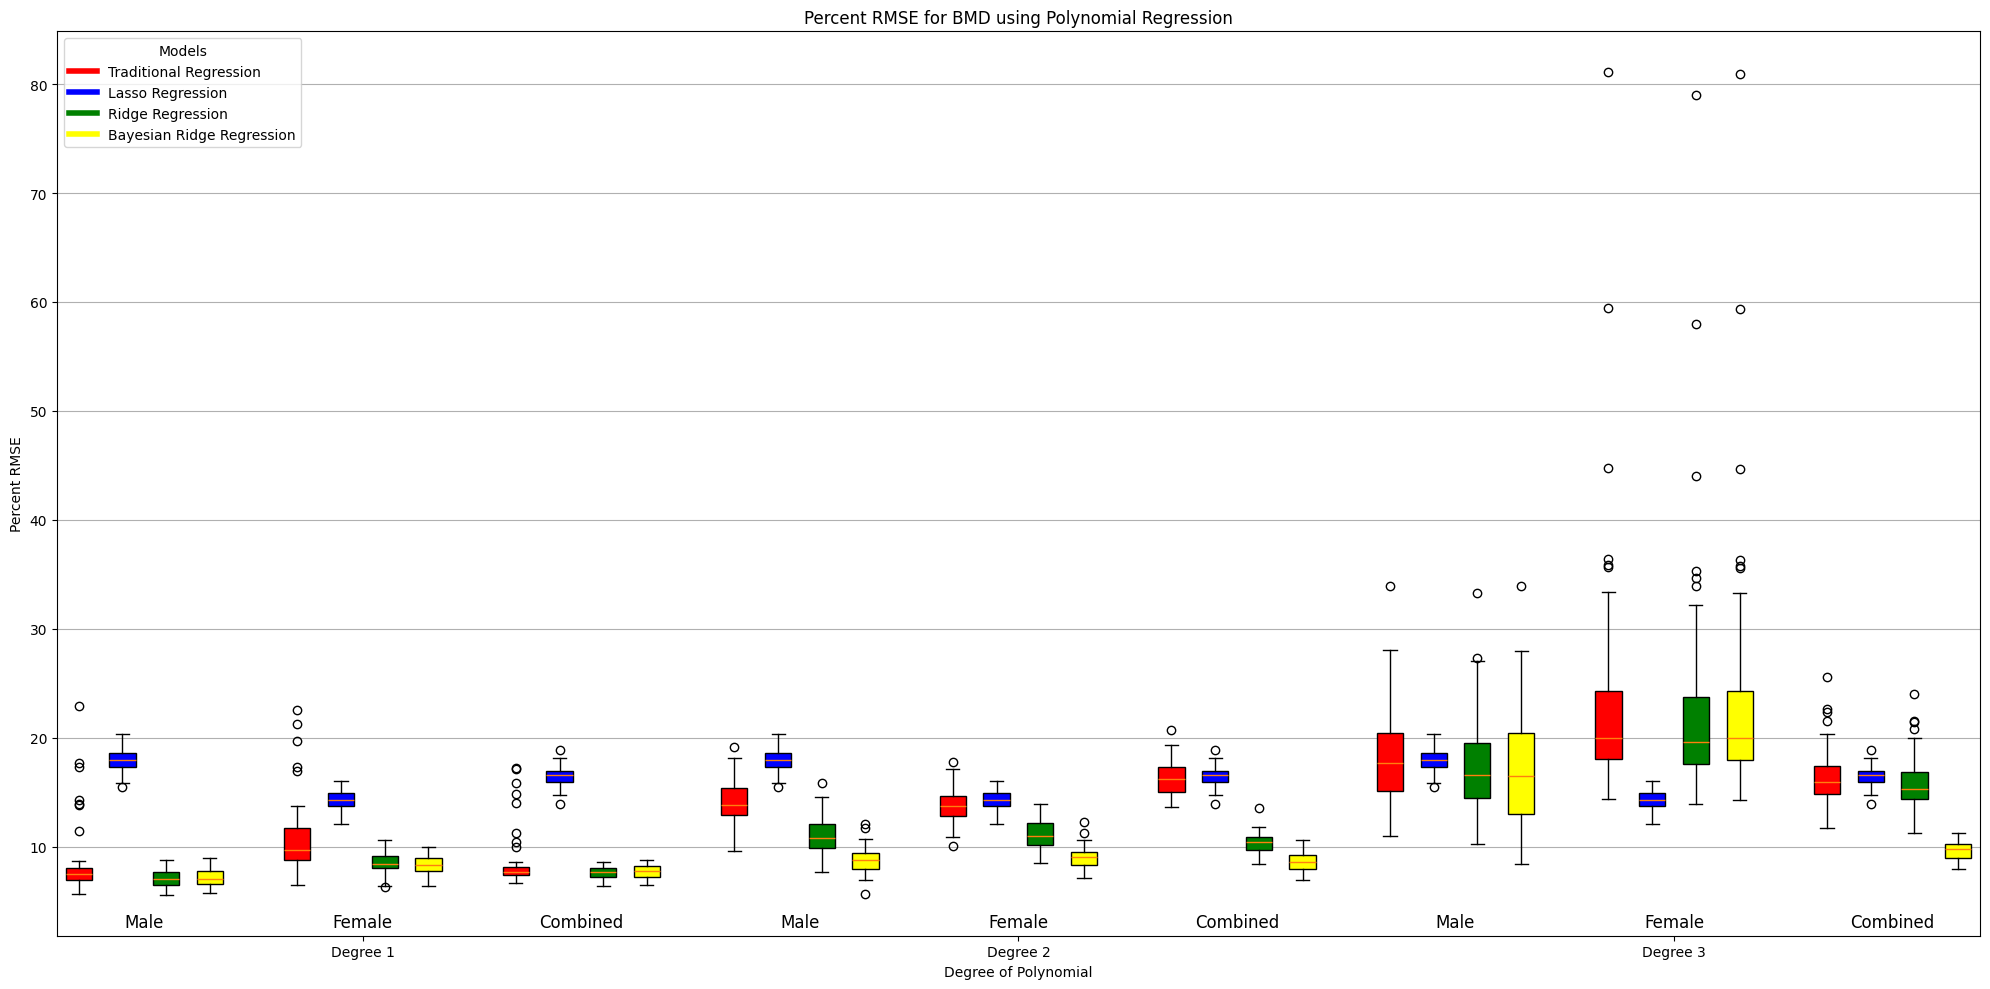

In [19]:
import matplotlib.pyplot as plt
import numpy as np


file_names = list(file_paths.keys())
num_files = len(file_names)
num_models = len(models)
degree_labels = [f'Degree {d}' for d in degree_array]
colors = ['red', 'blue', 'green', 'yellow'] 

all_rmse_values = []
box_positions = []
box_colors = []

gap = 3

for j, degree in enumerate(degree_array):
    for file_idx, file_name in enumerate(file_names):
        Percentage_Rmses = results[file_name][0]  # Extract Percentage_Rmses for the current file
        for model_idx, (model_name, _) in enumerate(models):
            rmse_values = Percentage_Rmses[:, :, j, model_idx].flatten()
            position = (j * (num_files * num_models + gap)) + (file_idx * (num_models + 1)) + model_idx + 1
            all_rmse_values.append(rmse_values)
            box_positions.append(position)
            box_colors.append(colors[model_idx])

plt.figure(figsize=(20, 10))

for rmse_values, position, color in zip(all_rmse_values, box_positions, box_colors):
    plt.boxplot(rmse_values, positions=[position], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))

degree_positions = [(i * (num_files * num_models + gap)) + ((num_files * num_models + gap) / 2) for i in range(len(degree_array))]
degree_labels = [f'Degree {d}' for d in degree_array]
plt.xticks(degree_positions, degree_labels)

for j in range(len(degree_array)):
    base_position = j * (num_files * num_models + gap)
    plt.text(base_position + 2.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Male', horizontalalignment='center', fontsize=12)
    plt.text(base_position + 7.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Female', horizontalalignment='center', fontsize=12)
    plt.text(base_position + 12.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Combined', horizontalalignment='center', fontsize=12)

plt.xlabel('Degree of Polynomial')
plt.ylabel('Percent RMSE')
plt.title('Percent RMSE for BMD using Polynomial Regression')

legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend_labels = [model_name for model_name, _ in models]
plt.legend(legend_handles, legend_labels, title='Models')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error
from math import sqrt


def evaluate_models(file_path, num_runs, num_splits, degree_array, models, excluded_columns):
    data = pd.read_csv(file_path)
    
    Percentage_Rmses = np.zeros((num_runs, num_splits, len(degree_array), len(models)))
    
    for run in range(num_runs):
        print(f"Run {run+1}/{num_runs} for {file_path}")
        kf = KFold(n_splits=num_splits, shuffle=True, random_state=run)
        
        for fold, (train_index, test_index) in enumerate(kf.split(data)):
            print(f"  Fold {fold+1}/{num_splits}")
            
            train_df = data.iloc[train_index]
            test_df = data.iloc[test_index]
            X_train = train_df.drop(columns=excluded_columns)
            y_train = train_df['% fat - Total']
            X_test = test_df.drop(columns=excluded_columns)
            y_test = test_df['% fat - Total']

            normalizer = StandardScaler()
            X_train = normalizer.fit_transform(X_train)
            X_test = normalizer.transform(X_test)

            for model_idx, (model_name, model) in enumerate(models):
                for j in range(len(degree_array)):
                    pipeline = make_pipeline(PolynomialFeatures(degree_array[j]), model)
                    pipeline.fit(X_train, y_train)
                    test_predictions = pipeline.predict(X_test)
                    test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
                    average_alm_test = np.mean(y_test)
                    percent_rmse = (test_rmse / average_alm_test) * 100
                    Percentage_Rmses[run, fold, j, model_idx] = percent_rmse

    mean_rmse = np.mean(Percentage_Rmses, axis=1)
    std_rmse = np.std(Percentage_Rmses, axis=1)

    return Percentage_Rmses, mean_rmse, std_rmse

# File paths of the CSV files
file_paths = {
    'Male Data': './../Data/male.csv',
    'Female Data': './../Data/female.csv',
    'Complete Data': './../Data/complete_data.csv'
}

num_runs = 10
num_splits = 5
degree_array = [1, 2, 3]
models = [
    ("Traditional Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Bayesian Ridge Regression", BayesianRidge())
]
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]

results = {}
for name, file_path in file_paths.items():
    Percentage_Rmses, mean_rmse, std_rmse = evaluate_models(file_path, num_runs, num_splits, degree_array, models, excluded_columns)
    results[name] = (Percentage_Rmses, mean_rmse, std_rmse)

for name, (Percentage_Rmses, mean_rmse, std_rmse) in results.items():
    print(f"\nResults for {name}:")
    print("Mean Percentage RMSEs for each run and degree:")
    print(mean_rmse)
    print("\nStandard Deviation of Percentage RMSEs for each run and degree:")
    print(std_rmse)


Run 1/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 2/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 3/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 4/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 5/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 6/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 7/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 8/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 9/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 10/10 for ./../Data/male.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 1/10 for ./../Data/female.csv
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Run 2/10 for ./../Data/female.csv
  Fold

In [21]:
print(Percentage_Rmses)

column_averages = np.mean(Percentage_Rmses, axis=0)
print("Average RMSEs are:", column_averages)
print(mean_rmse)

[[[[13.64502547 18.28040605 13.35514435 13.40607228]
   [24.53216361 17.60662786 15.74719595 13.91830746]
   [24.75049099 17.90607834 23.90863036 17.56943576]]

  [[14.00414793 17.5970808  13.44517568 13.29851094]
   [26.65727324 16.50545845 15.90299677 12.96710879]
   [32.12573306 16.65637955 31.23212635 18.33286131]]

  [[13.77207313 16.89272749 13.58950697 13.63785256]
   [31.45774347 16.13775018 15.31044895 12.89101006]
   [28.3947827  16.20454394 27.1949385  19.82646554]]

  [[14.95525742 18.94671992 14.48423342 14.39764259]
   [26.04085466 18.92511733 15.77797456 13.5003223 ]
   [28.29534025 18.77197227 27.19530371 17.75009203]]

  [[60.85745738 18.76710392 14.7528654  14.73486526]
   [26.73897822 18.25611442 15.95527977 14.36291916]
   [22.51956533 19.35317249 21.93050423 18.4101699 ]]]


 [[[49.74737487 16.57185729 14.167446   13.93968663]
   [27.33618924 15.46514389 14.21673406 13.28442083]
   [36.53113806 17.00976206 36.32900369 20.50059167]]

  [[12.94610837 16.60623664 12.8

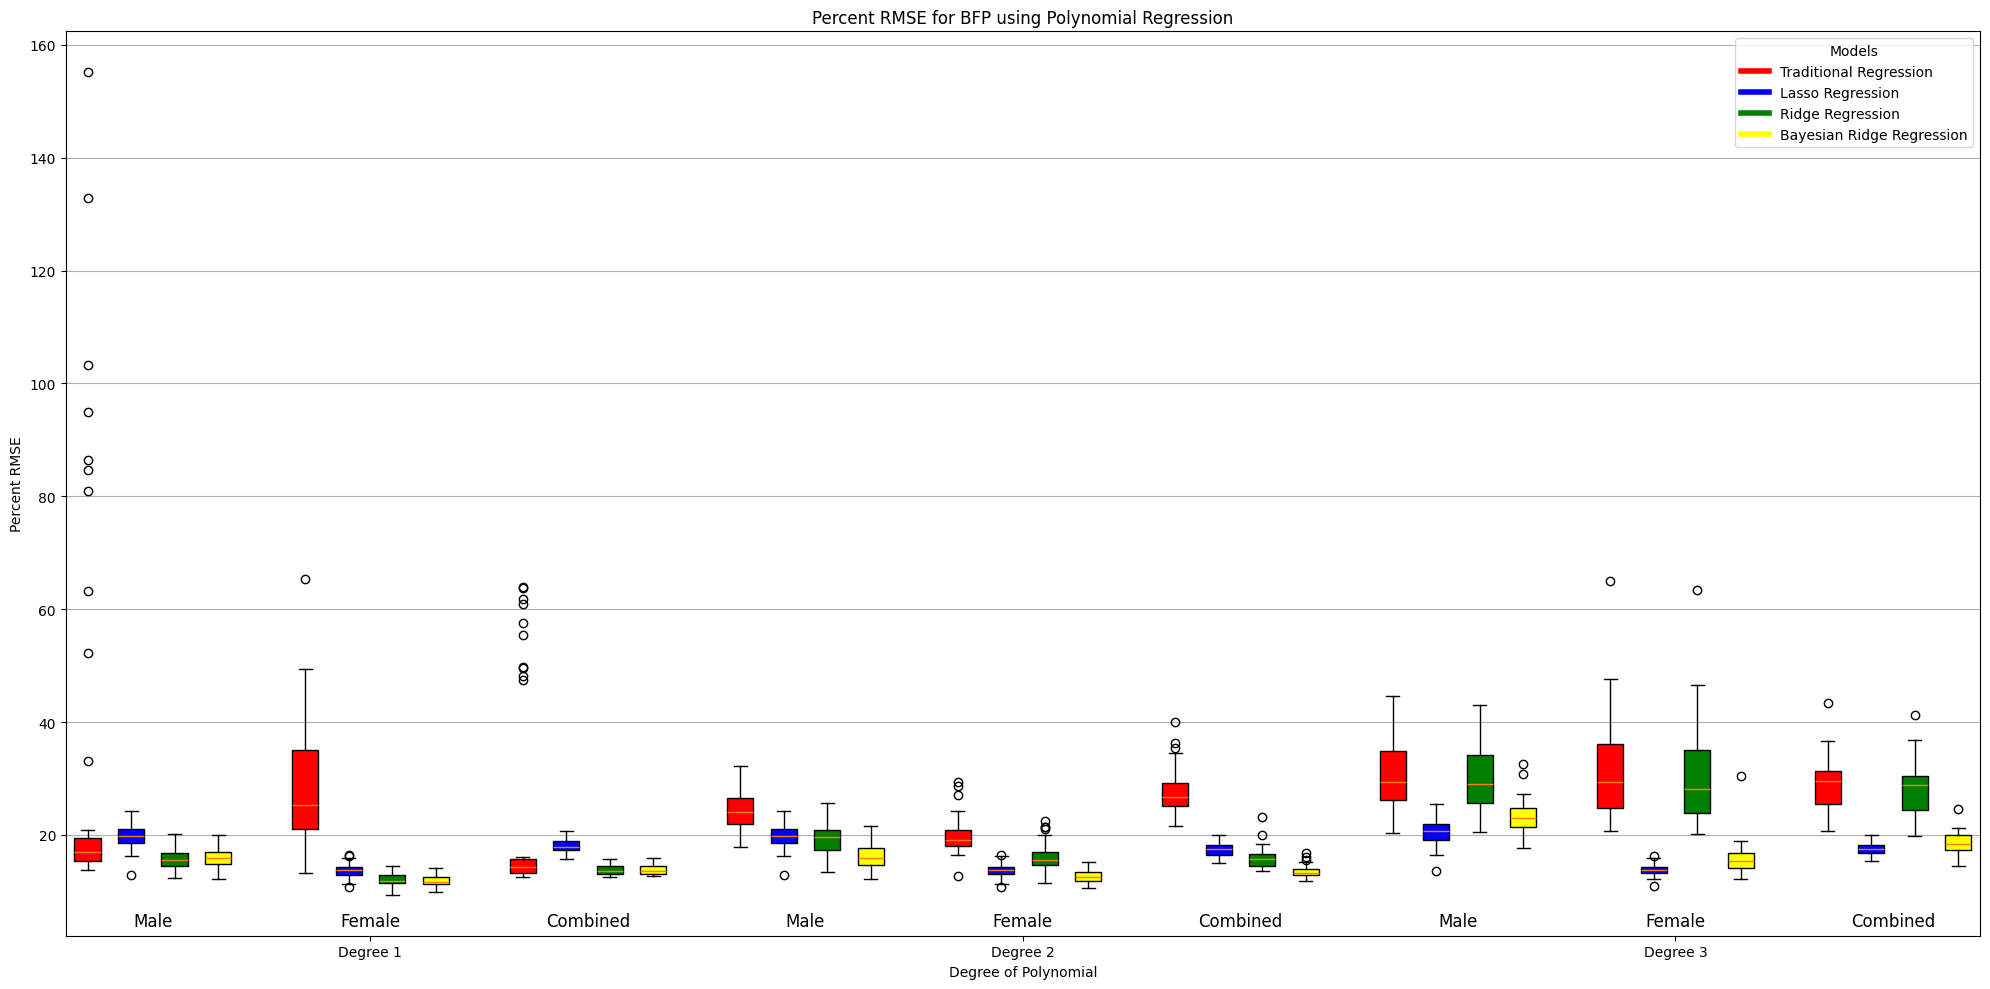

In [22]:
import matplotlib.pyplot as plt
import numpy as np


file_names = list(file_paths.keys())
num_files = len(file_names)
num_models = len(models)
degree_labels = [f'Degree {d}' for d in degree_array]
colors = ['red', 'blue', 'green', 'yellow'] 

all_rmse_values = []
box_positions = []
box_colors = []

gap = 3

for j, degree in enumerate(degree_array):
    for file_idx, file_name in enumerate(file_names):
        Percentage_Rmses = results[file_name][0]  # Extract Percentage_Rmses for the current file
        for model_idx, (model_name, _) in enumerate(models):
            rmse_values = Percentage_Rmses[:, :, j, model_idx].flatten()
            position = (j * (num_files * num_models + gap)) + (file_idx * (num_models + 1)) + model_idx + 1
            all_rmse_values.append(rmse_values)
            box_positions.append(position)
            box_colors.append(colors[model_idx])

plt.figure(figsize=(20, 10))

for rmse_values, position, color in zip(all_rmse_values, box_positions, box_colors):
    plt.boxplot(rmse_values, positions=[position], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))

degree_positions = [(i * (num_files * num_models + gap)) + ((num_files * num_models + gap) / 2) for i in range(len(degree_array))]
degree_labels = [f'Degree {d}' for d in degree_array]
plt.xticks(degree_positions, degree_labels)


for j in range(len(degree_array)):
    base_position = j * (num_files * num_models + gap)
    plt.text(base_position + 2.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Male', horizontalalignment='center', fontsize=12)
    plt.text(base_position + 7.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Female', horizontalalignment='center', fontsize=12)
    plt.text(base_position + 12.5, plt.ylim()[0]+ 0.005*(plt.ylim()[1] * plt.ylim()[0]), 'Combined', horizontalalignment='center', fontsize=12)

plt.xlabel('Degree of Polynomial')
plt.ylabel('Percent RMSE')
plt.title('Percent RMSE for BFP using Polynomial Regression')

legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend_labels = [model_name for model_name, _ in models]
plt.legend(legend_handles, legend_labels, title='Models')

plt.grid(axis='y')
plt.tight_layout()
plt.show()
